In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# np.set_printoptions(suppress=True)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC, SVC

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [8]:
with open('modeling_data_final','rb') as read_file:
    df = pickle.load(read_file)

In [9]:
df.michelin.value_counts()

0    7423
1     143
Name: michelin, dtype: int64

In [10]:
df.head(3)

,review_count,michelin,alcohol_beer_and_wine,alcohol_full_bar,alcohol_none,noise_average,noise_loud,noise_quiet,noise_very_loud,outdoor_seating_False,...,pricerange_2,pricerange_3,pricerange_4,takes_reservations_False,takes_reservations_True,wifi_free,wifi_no,stars_3,stars_4,stars_5
1,170,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,1,0
105,380,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
341,100,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [11]:
df.columns

Index(['review_count', 'michelin', 'alcohol_beer_and_wine', 'alcohol_full_bar',
       'alcohol_none', 'noise_average', 'noise_loud', 'noise_quiet',
       'noise_very_loud', 'outdoor_seating_False', 'outdoor_seating_True',
       'attire_casual', 'attire_dressy', 'attire_formal',
       'good_for_groups_False', 'good_for_groups_True', 'pricerange_1',
       'pricerange_2', 'pricerange_3', 'pricerange_4',
       'takes_reservations_False', 'takes_reservations_True', 'wifi_free',
       'wifi_no', 'stars_3', 'stars_4', 'stars_5'],
      dtype='object')

In [12]:
# df.michelin = df.michelin.apply(lambda x: 1 if x == 0 else 0)

In [13]:
df.michelin.value_counts()

0    7423
1     143
Name: michelin, dtype: int64

In [14]:
X = df.drop(['michelin'], axis = 1)
y = df.michelin

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [17]:
X_train_ros, y_train_ros = RandomOverSampler(random_state=30).fit_sample(X_train, y_train)
X_train_smote, y_train_smote = SMOTE(random_state = 30).fit_sample(X_train, y_train)
X_train_ada, y_train_ada = ADASYN(random_state=30).fit_sample(X_train,y_train)
X_train_rus, y_train_rus = RandomUnderSampler(random_state=30).fit_sample(X_train,y_train)

In [18]:
df_mich = df.loc[df['michelin'] == 1]
df_nomich = df.loc[df['michelin'] == 0]

## Testing Model Performance

In [22]:
def runall(X_train, y_train):
    
        
    X_dummy, X_test, y_dummy, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
    
    
    #kNN
    model_knn = KNeighborsClassifier(n_neighbors=3)
    model_knn.fit(X_train, y_train)
    knn_pred = model_knn.predict(X_test)

    #Logistic Regression
    model_log = LogisticRegression(class_weight='balanced', solver= 'liblinear', C=4)
    model_log.fit(X_train, y_train)
    log_pred = model_log.predict(X_test)

    #Bernoulli Bayes
    nb_bern = BernoulliNB()
    nb_bern.fit(X_train, y_train)
    bern_pred = nb_bern.predict(X_test)

    #Gaussian Bayes
    nb_gauss = GaussianNB()
    nb_gauss.fit(X_train, y_train)
    gauss_pred = nb_gauss.predict(X_test)

    #Tree Model
    model_tree = DecisionTreeClassifier(class_weight='balanced')
    model_tree.fit(X_train, y_train)
    tree_pred = model_tree.predict(X_test)

    #Random Forest
    model_forest = RandomForestClassifier(class_weight='balanced', n_estimators=100)
    model_forest.fit(X_train, y_train)
    forest_pred = model_forest.predict(X_test)


    print('Model: kNN', "\n", recall_score(y_test, knn_pred), "\n",
             confusion_matrix(y_test,knn_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(knn_pred, y_test),"\n")
            
    print('Model: Logistic Regression', "\n", recall_score(y_test, log_pred), "\n",
             confusion_matrix(y_test, log_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(log_pred, y_test),"\n")

    print('Model: Bernoulli Bayes', "\n", recall_score(y_test, bern_pred), "\n",
             confusion_matrix(y_test, bern_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(bern_pred, y_test),"\n")

    print('Model: Gaussian Bayes', "\n", recall_score(y_test, gauss_pred), "\n",
             confusion_matrix(y_test, gauss_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(gauss_pred, y_test),"\n")

    print('Model: Tree', "\n", recall_score(y_test, tree_pred), "\n",
             confusion_matrix(y_test,tree_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(tree_pred, y_test),"\n")

    print('Model: Random Forest', "\n", recall_score(y_test, forest_pred), "\n",
             confusion_matrix(y_test,forest_pred, labels=[1,0]), "\n",
             'F1 Score: ', f1_score(forest_pred, y_test),"\n")



## Tune Logistic C

In [23]:
r = range(1,20)

In [24]:
my_list = []

for i in range(1, 20):
    model_log = LogisticRegression(class_weight='balanced', solver= 'liblinear', C=i)
    model_log.fit(X_train, y_train)
    log_pred = model_log.predict(X_test)
    my_list.append(f1_score(log_pred, y_test))


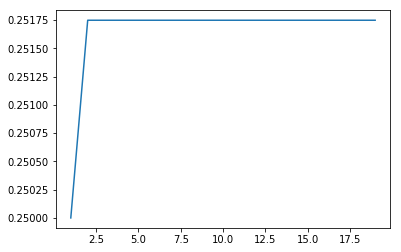

In [25]:
plt.plot(r, my_list)

In [27]:
#weight balanced

runall(X_train, y_train)

Model: kNN 
 0.19047619047619047 
 [[   4   17]
 [   2 1491]] 
 F1 Score:  0.2962962962962963 

Model: Logistic Regression 
 0.8571428571428571 
 [[  18    3]
 [ 104 1389]] 
 F1 Score:  0.2517482517482518 

Model: Bernoulli Bayes 
 0.8095238095238095 
 [[  17    4]
 [  64 1429]] 
 F1 Score:  0.3333333333333333 

Model: Gaussian Bayes 
 0.8571428571428571 
 [[  18    3]
 [ 104 1389]] 
 F1 Score:  0.2517482517482518 

Model: Tree 
 0.5238095238095238 
 [[  11   10]
 [  26 1467]] 
 F1 Score:  0.37931034482758624 

Model: Random Forest 
 0.5238095238095238 
 [[  11   10]
 [  15 1478]] 
 F1 Score:  0.4680851063829788 



In [28]:
# weight 4:1
runall(X_train_rus, y_train_rus)

Model: kNN 
 0.5714285714285714 
 [[  12    9]
 [ 483 1010]] 
 F1 Score:  0.046511627906976744 

Model: Logistic Regression 
 0.8571428571428571 
 [[  18    3]
 [ 125 1368]] 
 F1 Score:  0.21951219512195125 

Model: Bernoulli Bayes 
 0.8571428571428571 
 [[  18    3]
 [ 119 1374]] 
 F1 Score:  0.2278481012658228 

Model: Gaussian Bayes 
 0.8571428571428571 
 [[  18    3]
 [ 104 1389]] 
 F1 Score:  0.2517482517482518 

Model: Tree 
 0.8095238095238095 
 [[  17    4]
 [ 233 1260]] 
 F1 Score:  0.12546125461254612 

Model: Random Forest 
 0.8095238095238095 
 [[  17    4]
 [ 168 1325]] 
 F1 Score:  0.16504854368932043 



In [65]:
# weight 3:1
runall(X_train_rus, y_train_rus)

Model: kNN 
 0.6875 
 [[ 22  10]
 [432 896]] 
 F1 Score:  0.09053497942386832 

Model: Logistic Regression 
 0.9375 
 [[  30    2]
 [ 216 1112]] 
 F1 Score:  0.21582733812949637 

Model: Bernoulli Bayes 
 0.875 
 [[  28    4]
 [ 109 1219]] 
 F1 Score:  0.33136094674556216 

Model: Gaussian Bayes 
 0.84375 
 [[  27    5]
 [ 130 1198]] 
 F1 Score:  0.28571428571428575 

Model: Tree 
 0.875 
 [[  28    4]
 [ 189 1139]] 
 F1 Score:  0.22489959839357432 

Model: Random Forest 
 0.875 
 [[  28    4]
 [ 122 1206]] 
 F1 Score:  0.30769230769230765 



In [67]:
# weight 2:1
runall(X_train_rus, y_train_rus)

Model: kNN 
 0.6875 
 [[ 22  10]
 [432 896]] 
 F1 Score:  0.09053497942386832 

Model: Logistic Regression 
 0.9375 
 [[  30    2]
 [ 173 1155]] 
 F1 Score:  0.25531914893617025 

Model: Bernoulli Bayes 
 0.875 
 [[  28    4]
 [ 109 1219]] 
 F1 Score:  0.33136094674556216 

Model: Gaussian Bayes 
 0.84375 
 [[  27    5]
 [ 130 1198]] 
 F1 Score:  0.28571428571428575 

Model: Tree 
 0.875 
 [[  28    4]
 [ 198 1130]] 
 F1 Score:  0.21705426356589147 

Model: Random Forest 
 0.875 
 [[  28    4]
 [ 134 1194]] 
 F1 Score:  0.288659793814433 



In [69]:
# weight balanced
# This one performs the best
# undersampling works much better
# surprisingly, weight didn't help

runall(X_train_rus, y_train_rus)

Model: kNN 
 0.6875 
 [[ 22  10]
 [432 896]] 
 F1 Score:  0.09053497942386832 

Model: Logistic Regression 
 0.90625 
 [[  29    3]
 [ 116 1212]] 
 F1 Score:  0.3276836158192091 

Model: Bernoulli Bayes 
 0.875 
 [[  28    4]
 [ 109 1219]] 
 F1 Score:  0.33136094674556216 

Model: Gaussian Bayes 
 0.84375 
 [[  27    5]
 [ 130 1198]] 
 F1 Score:  0.28571428571428575 

Model: Tree 
 0.90625 
 [[  29    3]
 [ 214 1114]] 
 F1 Score:  0.2109090909090909 

Model: Random Forest 
 0.875 
 [[  28    4]
 [ 143 1185]] 
 F1 Score:  0.27586206896551724 



In [70]:
runall(X_train_ros, y_train_ros)

Model: kNN 
 0.25 
 [[   8   24]
 [  22 1306]] 
 F1 Score:  0.2580645161290323 

Model: Logistic Regression 
 0.875 
 [[  28    4]
 [  92 1236]] 
 F1 Score:  0.3684210526315789 

Model: Bernoulli Bayes 
 0.875 
 [[  28    4]
 [ 108 1220]] 
 F1 Score:  0.33333333333333337 

Model: Gaussian Bayes 
 0.8125 
 [[  26    6]
 [ 126 1202]] 
 F1 Score:  0.28260869565217395 

Model: Tree 
 0.375 
 [[  12   20]
 [  14 1314]] 
 F1 Score:  0.41379310344827586 

Model: Random Forest 
 0.46875 
 [[  15   17]
 [  15 1313]] 
 F1 Score:  0.4838709677419355 



In [71]:
runall(X_train_smote, y_train_smote)

Model: kNN 
 0.625 
 [[  20   12]
 [  87 1241]] 
 F1 Score:  0.28776978417266186 

Model: Logistic Regression 
 0.5625 
 [[  18   14]
 [  32 1296]] 
 F1 Score:  0.43902439024390244 

Model: Bernoulli Bayes 
 0.84375 
 [[  27    5]
 [  71 1257]] 
 F1 Score:  0.41538461538461535 

Model: Gaussian Bayes 
 0.8125 
 [[  26    6]
 [  72 1256]] 
 F1 Score:  0.39999999999999997 

Model: Tree 
 0.40625 
 [[  13   19]
 [  21 1307]] 
 F1 Score:  0.393939393939394 

Model: Random Forest 
 0.46875 
 [[  15   17]
 [  15 1313]] 
 F1 Score:  0.4838709677419355 



In [36]:
runall(X_train_ada, y_train_ada)

Model: kNN 
 0.625 
 [[  20   12]
 [  87 1241]] 
 F1 Score:  0.28776978417266186 

Model: Logistic Regression 
 0.40625 
 [[  13   19]
 [  22 1306]] 
 F1 Score:  0.3880597014925374 

Model: Bernoulli Bayes 
 0.84375 
 [[  27    5]
 [  71 1257]] 
 F1 Score:  0.41538461538461535 

Model: Gaussian Bayes 
 0.8125 
 [[  26    6]
 [  73 1255]] 
 F1 Score:  0.39694656488549623 

Model: Tree 
 0.375 
 [[  12   20]
 [  13 1315]] 
 F1 Score:  0.42105263157894735 

Model: Random Forest 
 0.40625 
 [[  13   19]
 [  13 1315]] 
 F1 Score:  0.4482758620689655 



In [29]:
#Logistic Regression
model_log = LogisticRegression(class_weight='balanced', solver= 'liblinear', C=4)
model_log.fit(X_train_rus, y_train_rus)
log_pred = model_log.predict(X_test)

model_log.coef_, model_log.intercept_

(array([[ 7.20742361e-04, -6.74609287e-02,  1.00202682e+00,
         -1.15301354e+00, -4.08278966e-01,  4.81494494e-01,
         -2.64509238e-01, -2.71539417e-02,  8.88179558e-03,
         -2.27329447e-01, -4.66371695e-01,  2.06737163e-01,
          4.11868806e-02,  3.77521773e-01, -5.95969424e-01,
         -1.25370943e+00, -1.89228159e+00,  2.11823748e-02,
          2.90636099e+00, -1.70773304e+00,  1.48928539e+00,
         -1.20045181e+00,  9.82004160e-01, -8.62238831e-02,
         -1.51927289e-01,  1.97035207e-02]]), array([-0.21844765]))

In [110]:
model_log.feature_names = X.columns
model_log.target_names = y.unique()

In [111]:
confusion_matrix(y_test, model_log.predict(X_test), labels=[1,0])

array([[  29,    3],
       [ 116, 1212]])

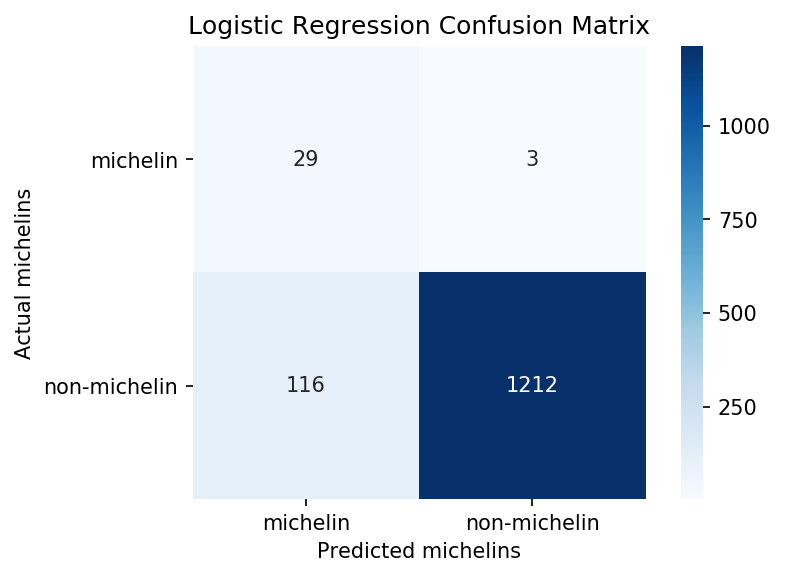

In [248]:
# Print confusion matrix 
log_confusion = confusion_matrix(y_test, model_log.predict(X_test), labels=[1,0])
plt.figure(dpi=150)

xticks = np.array(['michelin', 'non-michelin'])
yticks = np.array(['michelin', 'non-michelin'])
sns.heatmap(log_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=xticks, yticklabels=yticks)

plt.xlabel('Predicted michelins')
plt.ylabel('Actual michelins')
plt.yticks(rotation=0)
plt.title('Logistic Regression Confusion Matrix');

### Using specific restaurants to test model

In [28]:
steak_list = np.array([754,0,1,0,1,0,0,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1, 0, 0, 1])
steak_list = steak_list.reshape(1, 26)

In [29]:
alinea_list = np.array([2050,0,1,0,0,0,1,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1, 0, 0, 1])
alinea_list = alinea_list.reshape(1, 26)

In [30]:
rainforest_list = np.array([379,0,1,0,0,1,0,0 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0, 1, 0, 0])
rainforest_list = rainforest_list.reshape(1, 26)

In [31]:
dumpling_list = np.array([747,0,0,1,1,0,0,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,0, 0, 1, 0])
dumpling_list = dumpling_list.reshape(1, 26)

In [136]:
model_log.predict_proba(rainforest_list)

array([[0.98699864, 0.01300136]])

In [113]:
# with open('champ_model', 'wb') as to_write:
#     pickle.dump(model_log, to_write)

In [196]:
df_final = df.copy()
df_final.michelin = df_final.michelin.apply(lambda x: 'michelin' if x == 0 else 'not_michelin')
df_final.michelin.value_counts()

michelin        6653
not_michelin     143
Name: michelin, dtype: int64

In [197]:
X_final = df_final.drop('michelin', axis = 1)
y_final = df_final.michelin

### From the confusion matrices and metrics above we've chosen our champion model

In [198]:
test = LogisticRegression(class_weight='balanced', solver= 'liblinear', C=4)
test.fit(X_train_rus, y_train_rus)

LogisticRegression(C=4, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [199]:
test.feature_names = X.columns
test.target_names = y.unique()

In [200]:
test.target_names

array([0, 1])

In [201]:
test.predict_proba(alinea_list)

array([[0.01082196, 0.98917804]])

In [202]:
test.predict_proba(rainforest_list)

array([[0.99767094, 0.00232906]])

In [203]:
test.coef_

array([[ 0.00033709, -0.24297219,  1.02383852, -1.05595571,  0.33600328,
        -1.09007624,  0.54233744, -0.06335386, -0.03596012, -0.23912927,
        -0.4543706 ,  0.07381343,  0.10546778,  0.8682232 , -1.14331259,
        -1.92340132, -1.27493406,  1.09827293,  1.82497306, -1.34532119,
         1.0702318 , -0.99495561,  0.71986623, -0.39436585,  0.09571135,
         0.02356511]])

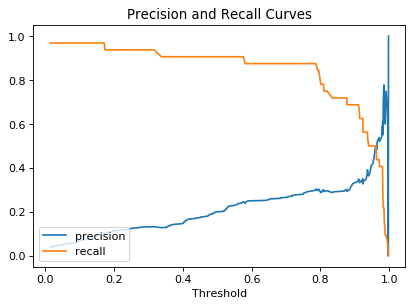

In [271]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, test.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

### Pickling my model for Flask

In [205]:
with open('test', 'wb') as to_write:
    pickle.dump(test, to_write)